## Блиц на повторение, ура!

In [99]:
import requests

Есть url рассказа О.Генри: http://www.serann.ru/text/poslednii-list-9749

Нужно:

1) (2 балла) Вывести "чистый текст рассказа" без каких либо знаков;

2) (2 балла) Посчитать количество предложений в тексте;

3) (1 балл) Посчитать количество предложений, в которых встречается слово "лист" (как с большой, так и с маленькой буквы).

In [100]:
req = requests.get('http://www.serann.ru/text/poslednii-list-9749')
req.status_code

200

In [103]:
my_text = req.text.split(sep = '<div class="full-text">')[1]
my_text = my_text.split(sep = '</div> <!-- /node-inner -->')[0]

In [104]:
my_text = my_text.replace('''</div>\n''','\n ').replace('<div class="p">', '')

In [105]:
sentences = my_text.replace('…', '.').replace('!','.').replace('?','.').split(sep = '.')

In [106]:
len(sentences)

196

In [107]:
i = 0
for sent in sentences:
    if 'лист' in sent.lower():
        #print(sent)
        i+=1

In [108]:
i

16

### А теперь - пандас!

In [91]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [21]:
Counter?

In [28]:
sns.distplot?

In [88]:
import pandas as pd
ufo_df = pd.read_csv('/Users/denikekate/Desktop/scrubbed.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Дан датасет с заявками америкацев по обнаружению НЛО в последние годы. 
Заметьте, что это реальные данные из архива, в них могут быть ошибки, неточности неправильные форматы и тд. Это в ваших руках - преобразовать данные удобным вам образом.

https://www.kaggle.com/donyoe/exploring-ufo-sightings

--------------------------------------------------------------
блок задач на 2 балла:
1. В каком городе больше всего заявлено встреч с НЛО?
2. В скольки городах встретились НЛО? 
3. Перечислите страны, в которых были встречи с НЛО
--------------------------------------------------------------
блок задач на 4 балла:
Вам будет нелегко преобразовывать данные, поэтому сначала мы немного это обсудим.
4. Постройте распределение встреч по широте и долготе, сделайте предположения о всплесках - что это за районы
5. Создайте новую колонку с годом встречи (его нужно достать из имеющихся данных), постройте график с динамикой количества встреч. Что вы можете сказать о ней? В каком году произошло больше всего встреч?

In [89]:
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [109]:
from collections import Counter
Counter(ufo_df.city).most_common(5)

[('seattle', 525),
 ('phoenix', 454),
 ('portland', 374),
 ('las vegas', 368),
 ('los angeles', 353)]

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

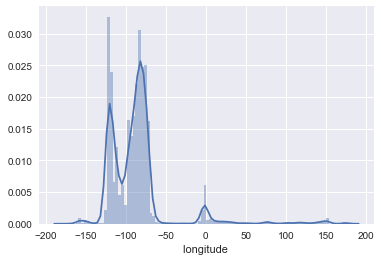

In [111]:
sns.distplot(ufo_df['longitude '], bins = 100)

Задача (3 балла): 
Путешевствие по википедии
    
    Возьмите исходную страницу википедии (любую, которая вам понравится). Найдите на ней ссылки. Затем найдите все внешние ссылки (содержат 'http' как подстроку).
    Выберете 1 ссылку. Зайдите на нее и повторите исходный алгоритм и так 5 раз (или столько, сколько ссылок на странице). Посмотрите, какая страница у вас получится. Проверьте это в интерфейсе википедии в браузере.

In [28]:
req = requests.get('https://ru.wikipedia.org/wiki/День_сурка_(фильм)')
req.status_code

200

In [30]:
soup = BeautifulSoup(req.text, 'html.parser')

In [46]:
i = 0
for link in soup.find_all('a'):
    if link.get('href'):
        if 'https' in link.get('href'):
            new_link = link.get('href')
            break

In [47]:
new_link

'https://en.wikipedia.org/wiki/Brian_Doyle-Murray'

In [55]:
req = requests.get('https://mamaw.ru/')

In [ ]:
red

In [72]:
soup = BeautifulSoup(req.text, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="ru-RU" prefix="og: http://ogp.me/ns#">
 <head>
  <meta content="Z_ZDCycSPuSqzcy66_OpZ-9wRNcwLJTkut0GqXWpjm8" name="google-site-verification"/>
  <meta content="288241adca6ea5a8" name="yandex-verification"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <title>
   Мама работает - помощь молодым мамам
  </title>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://mamaw.ru/xmlrpc.php" rel="pingback"/>
  <!-- This site is optimized with the Yoast SEO plugin v5.8 - https://yoast.com/wordpress/plugins/seo/ -->
  <meta content='Проект "Мама работает" - тренинги, психологическая поддержка, поиск работы для молодых мам.' name="description">
   <link href="https://mamaw.ru/" rel="canonical"/>
   <meta content="ru_RU" property="og:locale"/>
   <meta content="website" property="og:type"/>
   <meta content="Мама работает - помощь молодым мамам" property="og:title"/>
   <meta co

In [67]:
soup.title.string.strip()

'Мама работает - помощь молодым мамам'

In [70]:
len(soup.find_all('a'))

100

In [73]:
soup.find_all("ul", { "class" : "sub-menu" })

[<ul class="sub-menu">
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-222" id="menu-item-222"><a href="https://mamaw.ru/about/">О проекте “Мама работает”</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-214" id="menu-item-214"><a href="https://mamaw.ru/about/about-fund/">О фонде “Дорога в жизнь”</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-3165" id="menu-item-3165"><a href="https://mamaw.ru/komanda-proekta/">Команда проекта</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-212" id="menu-item-212"><a href="https://mamaw.ru/about/contacts/">Контакты</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-213" id="menu-item-213"><a href="https://mamaw.ru/about/partners/">Наши партнеры</a></li>
 </ul>, <ul class="sub-menu">
 <li class="menu-item menu-item-type-taxonomy menu-item-object-category menu-item-2976

### Вишенка на торте

In [79]:
from IPython.core.display import HTML

#HTML(req.text)

In [98]:
%matplotlibinline

ERROR:root:Line magic function `%matplotlibinline` not found.


In [97]:
#from IPython.display import Image
#Image('https://petcube.com/blog/content/images/2017/04/kitten-supplies-cover-1.jpg')
#Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')
Image('http://all4desktop.com/data_images/original/4244206-kitten.jpg')

<IPython.core.display.Image object>

<img src='https://petcube.com/blog/content/images/2017/04/kitten-supplies-cover-1.jpg'>

### Домашнее задание - исследование коворкингов

1. Скачайте с московского открытого портала данных информацию о коворкингах в Москве, загрузите ее как dataframe: https://data.mos.ru/opendata/7710071979-kovorkingi

2. (4 балл) Посчитайте количество и долю бесплатных коворкингов

3. (4 балла) В каком коворкинге можно отдать максимальную сумму денег единовременно?

4. (6 баллов) Рассморим коворкинги с точки зрения SEO оптимизации (это игрушечный кейс, не думаете :) ). Для этого создайте следцующие столбцы в dataframe: 
    а) столбец с названием сайта коворкинга (title html страницы)
    б) посчитайте, сколько раз название коворкига (первый столбец датафрейма) встречалось в его html странице
    в) посчитайте количество внешних ссылок на странице
   
    У какого коворкинга количество внешних ссылок на странице максимально? У кого минимально? У кого больше всего названий?
        